In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
import tensorflow.keras.layers as L
import keras
import tqdm

In [2]:
import json

In [3]:
f = open("/content/drive/MyDrive/голосовые помощники/processor/vocab.json")
phonemes: dict[str, int] = json.load(f)
f.close()

phonemes_reverse ={j:i for i, j in phonemes.items()}

In [4]:
params = {
    'batch_size': 4,
    'phonemes': 392
}

In [5]:
df = pd.read_csv('/content/drive/MyDrive/голосовые помощники/xls-r_dataset.csv')#.values.tolist()
df = df.drop(df.columns[0], axis=1)
df.head()
train_df, test_df = train_test_split(df, test_size=0.1)
train_df, val_df = train_test_split(train_df)

In [6]:
abc = "? абвгдеёжзийклмнопрстуфхшщчцьыъэюя"
def vectorize_str(labels: tuple[str]):
    lengths = np.zeros((len(labels),), dtype='int')
    letters = np.zeros((len(labels),  max(map(len, labels)), len(abc)), dtype=float)

    for i, label in enumerate(labels):
        lengths[i] = len(label)
        j=0
        for c in label.lower():
            if not c in abc:
                lengths[i]-=1
            else:
                letters[i,j, abc.index(c)]=1
                # letters[i,j]= abc.index(c)
                j+=1
    
    return letters, lengths
def decode_str(X):
    r = []
    for i in range(X.shape[0]):
        s = []
        s1 = []
        for j in range(X.shape[1]):
            if X[i,j].argmax() >= 0:
                s.append(abc[X[i,j].argmax()])
            s1.append(abc[X[i,j,1:].argmax()+1])
        r.append(''.join(s)+'/'+''.join(s1))
    return r

In [7]:
def vectorize_phonemes(labels: tuple[str]):
    lengths = np.zeros((len(labels),), dtype='int')
    letters = np.zeros((len(labels),  max(map(len, labels)), params['phonemes']), dtype=float)
    # letters = torch.zeros(size=(len(labels),  max(map(len, labels))), dtype=float)

    for i, label in enumerate(labels):
        lengths[i] = len(label.split())
        for j, c in enumerate(label.split()):
            letters[i,j, phonemes[c]]=1
    
    return letters, lengths
def decode_phonemes(X):
    r = []
    for i in range(X.shape[0]):
        s = []
        for j in range(X.shape[1]):
            if X[i,j].argmax() >= 0:
                s.append(phonemes_reverse[int(X[i,j].argmax())])
        r.append(''.join(s))
    return r

In [8]:
train_df.iloc[1:4,1].tolist()

['a ɡ r ɔ ʃ e j e z e k a n tʃ y v aɪ ts',
 'q a z a a t f o ʃ i n i j',
 'k r a s t e s ts i t e t i a v o ɡ i v y k a ɲ u f n i']

In [9]:
v_str, v_str_len = vectorize_str(train_df.iloc[1:4,0].tolist())

In [10]:
vectorize_phonemes(train_df.iloc[1:4,1].tolist())

(array([[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]]]), array([18, 13, 27]))

In [11]:
decode_phonemes(vectorize_phonemes(train_df.iloc[1:4,1].tolist())[0])

['aɡrɔʃejezekantʃyvaɪts<pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad>',
 'qazaatfoʃinij<pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad>',
 'krastestsitetiavoɡivykaɲufni<pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad>']

In [12]:
v_str_len

array([21, 15, 30])

In [13]:
v_str.argmax(-1)

array([[24, 17, 19, 17, 25,  7,  7,  1, 10,  2, 13,  2, 16, 27, 11,  4,
         2,  7, 21, 20, 34,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [13, 17, 10,  8, 14,  1, 17, 21, 18, 22, 26,  7, 16, 11, 34,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [19,  2, 20, 27, 11, 20, 21, 11, 21, 29,  1, 32, 21, 11,  1,  2,
         4,  5, 11,  7,  4, 30,  1, 13, 17, 16, 33, 25, 16, 11]])

In [14]:
tf.nn.ctc_loss(
    v_str.argmax(-1),
    v_str.astype('float32'),
    v_str_len,
    v_str_len,
    logits_time_major=False,
    blank_index=0
)

Instructions for updating:
Prefer tf.tensor_scatter_nd_add, which offers the same functionality with well-defined read-write semantics.
Instructions for updating:
Prefer tf.tensor_scatter_nd_update, which offers the same functionality with well-defined read-write semantics.


<tf.Tensor: shape=(3,), dtype=float32, numpy=array([760.6861  ,  39.04912 ,  78.098236], dtype=float32)>

In [15]:
model = tf.keras.Sequential([
    tf.keras.Input((None, 392)),
    L.Conv1D(10, 3),
    L.Dense(35, activation='log_softmax')
])

In [16]:
model.compile(loss=tf.nn.ctc_loss)

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, None, 10)          11770     
                                                                 
 dense (Dense)               (None, None, 35)          385       
                                                                 
Total params: 12,155
Trainable params: 12,155
Non-trainable params: 0
_________________________________________________________________


# Training

Due to CTCLoss features we ned to write custm train loop.

In [21]:
train_df_batched = tf.data.Dataset.from_tensor_slices(train_df).batch(16)
val_df_batched =  tf.data.Dataset.from_tensor_slices(val_df).batch(16)

We have one batch as

In [ ]:
dummy_batch = next(iter(train_df_batched))
dummy_batch

In [27]:
list(map(lambda s: s.decode('utf-8'), dummy_batch[:, 0].numpy().tolist()))

['В итоге здесь не будет ничего',
 'Хорошее заканчивается',
 'Козёл отпущения',
 'Расчистить эти авгиевы конюшни',
 'Затянул канитель',
 'Думаю, нам пора расходиться по домам',
 'Возьми и вырви его из груди',
 'Я его раскусил',
 'Билет в один конец',
 'Подступ',
 'Довёл до белого каления',
 'хорошо кушай',
 'Бутылка воды',
 'Идя по двору',
 'Семеро козлят',
 'Найдёшь?']

Let's write a method to cnvert batch to representation, applicable for training:

In [31]:
def prepare_batch(batch):
    v_phonemes, v_phonemes_len = vectorize_phonemes([s.decode('utf-8') for s in batch[:, 1].numpy().tolist()])
    v_str, v_str_len = vectorize_str([s.decode('utf-8') for s in batch[:, 0].numpy().tolist()])
    return (v_phonemes, v_phonemes_len), (v_str, v_str_len)

In [40]:
def loss(model, x, y, str_len, training=True):
    with tf.GradientTape() as tape:
        pred = model(x, training=training)
        lv = tf.nn.ctc_loss(
            y.argmax(-1),
            pred,#.astype('float32'),
            str_len,
            str_len,
            logits_time_major=False,
            blank_index=0
        )
    return lv, tape.gradient(lv, model.trainable_variables)

In [41]:
optimizer = tf.keras.optimizers.Adam()

So, one train step can be written as follows:

In [42]:
(v_phonemes, v_phonemes_len), (v_str, v_str_len) = prepare_batch(dummy_batch)

In [44]:
def do_train_step(model, batched_input):
    epoch_loss = tf.keras.metrics.Mean()

    for batch in batched_input:
        (v_phonemes, v_phonemes_len), (v_str, v_str_len) = prepare_batch(dummy_batch)
        lv, grads = loss(model, v_phonemes, v_str, v_phonemes_len)
        optimizer.apply_gradients(zip(grads, model.trainable_variables))
        epoch_loss.update_state(lv)

    return epoch_loss.result()

In [59]:
def do_val_step(model, batched_input, v=True, once=True):
    epoch_loss = tf.keras.metrics.Mean()
    printed=False

    for batch in batched_input:
        (v_phonemes, v_phonemes_len), (v_str, v_str_len) = prepare_batch(dummy_batch)
        lv, grads = loss(model, v_phonemes, v_str, v_phonemes_len, False)
        epoch_loss.update_state(lv)
        if not printed and v:
            print(*decode_str(model(v_phonemes).numpy()), sep='\n')
        if not printed and once:
            printed = True

    return epoch_loss.result()

In [60]:
do_val_step(model, val_df_batched)

в итоге?е?и и нее??????????????????????????????????????/в итогеиеои и нее                                      
????????в?канее????????????????????????????????????????/о отпи ив канеесои                                     
ка?о уотпален??????????????????????????????????????????/казо уотпален                                          
р?суистиее теи а гиевы коне????????????????????????????/росуистиее теи а гиевы коне                            
в ияаул?ванете?????????????????????????????????????????/в ияауллванете                                         
?сла???????????????????????????????????????????????????/дслало                                                 
 анеги з тиеги ега??з ур ??????????????????????????????/ анеги з тиеги ега  з ур                               
рдего д?свуи ле????????????????????????????????????????/рдего дасвуи ле                                        
 ?л т в орванет????????????????????????????????????????/ ул т в орванет                                 

<tf.Tensor: shape=(), dtype=float32, numpy=156.5785>

In [61]:
train_losses = []
val_losses = []

In [62]:
epochs = 50
for i in range(epochs):
    print(f'Epoch {i}/{epochs}')
    train_losses.append(do_train_step(model, train_df_batched))
    val_losses.append(do_val_step(model, val_df_batched))

Epoch 0/50
в итоге?е?и и нее??????????????????????????????????????/в итогеиеии и нее                                      
????????в?кааее????????????????????????????????????????/о отпи ив кааеесои                                     
ка?о уотпален??????????????????????????????????????????/казо уотпален                                          
р?суистиее тти а гиевы коне????????????????????????????/росуистиее тти а гиевы коне                            
в тяаул?ванете?????????????????????????????????????????/в тяауллванете                                         
?ула???????????????????????????????????????????????????/дулало                                                 
 анеги з тиеги ега??з ур ??????????????????????????????/ анеги з тиеги ега  з ур                               
рдего д?свуи ле????????????????????????????????????????/рдего дасвуи ле                                        
у?лет в орванет????????????????????????????????????????/уулет в орванет                      

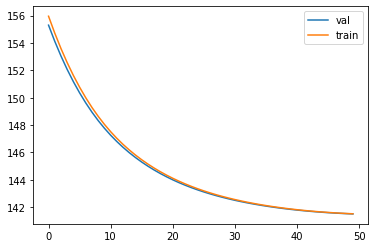

In [65]:
plt.plot(val_losses, label='val')
plt.plot(train_losses, label='train')
plt.legend()

Model is saved here: https://drive.google.com/file/d/1-10oWdl9BjsWY1elTKXIhulBspXMQEsO/view?usp=share_link